# class composition for fresh copy of BAIT

In [1]:
import os
os.chdir('/usr/local/home/sgchr/Documents/active_nn/freshBAIT')

In [2]:
import pickle
import torch
import resnet
import numpy as np

filename = "freshbait"

In [3]:
queried_idxs = pickle.load(open("Save/Queried_idxs/"  + "queried_idxs_" + filename + ".p", "rb"))
len(queried_idxs)

20

In [4]:
dataset = pickle.load(open("Save/Queried_idxs/" + "dataset_" + filename + ".p", "rb"))

In [5]:
Y_tr = dataset['Y_train']

In [6]:
[Y_tr[idx].item() for idx in queried_idxs[0][:10]]

[1, 1, 8, 7, 9, 6, 5, 7, 5, 1]

In [7]:
class_composition = [[Y_tr[idx].item() for idx in rd_idx] for rd_idx in queried_idxs]

In [8]:
for rd in range(20):
    class_rd = [sum(np.array(class_composition[rd]) == cl) for cl in range(10)]
    print(class_rd, sum(class_rd))

[152, 110, 125, 122, 124, 117, 113, 111, 119, 107] 1200
[125, 88, 141, 155, 141, 135, 102, 124, 111, 78] 1200
[103, 109, 149, 150, 138, 105, 99, 132, 116, 99] 1200
[130, 116, 110, 115, 138, 115, 122, 111, 99, 144] 1200
[119, 105, 167, 135, 132, 131, 127, 104, 69, 111] 1200
[117, 85, 131, 153, 144, 146, 118, 98, 92, 116] 1200
[96, 85, 152, 187, 135, 126, 117, 98, 102, 102] 1200
[85, 65, 142, 181, 132, 164, 155, 91, 126, 59] 1200
[128, 79, 139, 153, 148, 133, 143, 115, 92, 70] 1200
[133, 70, 133, 139, 153, 152, 102, 109, 89, 120] 1200
[134, 99, 122, 189, 123, 122, 113, 158, 57, 83] 1200
[101, 127, 124, 213, 110, 186, 89, 107, 66, 77] 1200
[117, 102, 146, 135, 113, 215, 78, 111, 97, 86] 1200
[103, 79, 116, 138, 207, 112, 99, 124, 100, 122] 1200
[185, 84, 95, 75, 96, 104, 115, 124, 153, 169] 1200
[121, 126, 162, 71, 120, 104, 167, 63, 110, 156] 1200
[156, 154, 77, 30, 50, 73, 184, 164, 154, 158] 1200
[143, 202, 84, 26, 75, 76, 123, 120, 210, 141] 1200
[62, 207, 61, 13, 55, 51, 164, 226, 19

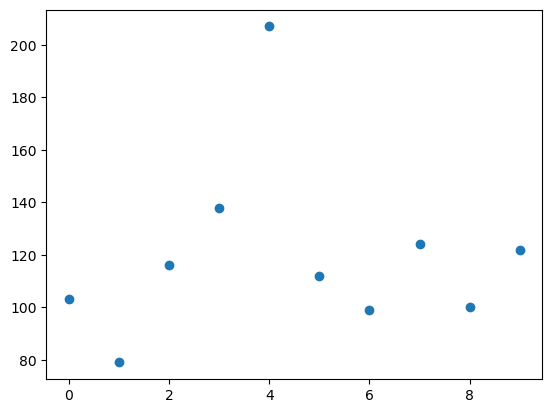

In [9]:
import matplotlib.pyplot as plt
for rd in range(13, 14):
    plt.plot([sum(np.array(class_composition[rd]) == cl) for cl in range(10)], 'o')
plt.show()

Code parallalism using numba

In [10]:
%matplotlib inline

In [11]:
from numba import njit

In [25]:
def friction_fn(v, vt):
    if v > vt:
        return - v * 3
    else:
        return - vt * 3 * np.sign(v)

def simulate_spring_mass_funky_damper(x0, T=10, dt=0.0001, vt=1.0):
    times = np.arange(0, T, dt)
    positions = np.zeros_like(times)
    
    v = 0
    a = 0
    x = x0
    positions[0] = x0/x0
    
    for ii in range(len(times)):
        if ii == 0:
            continue
        t = times[ii]
        a = friction_fn(v, vt) - 100*x
        v = v + a*dt
        x = x + v*dt
        positions[ii] = x/x0
    return times, positions

In [32]:
%time _ = simulate_spring_mass_funky_damper(0.1)

CPU times: user 141 ms, sys: 0 ns, total: 141 ms
Wall time: 139 ms


In [33]:
@njit  #(nogil=True)
def friction_fn(v, vt):
    if v > vt:
        return - v * 3
    else:
        return - vt * 3 * np.sign(v)

@njit  #(nogil=True)
def simulate_spring_mass_funky_damper(x0, T=10, dt=0.0001, vt=1.0):
    times = np.arange(0, T, dt)
    positions = np.zeros_like(times)
    
    v = 0
    a = 0
    x = x0
    positions[0] = x0/x0
    
    for ii in range(len(times)):
        if ii == 0:
            continue
        t = times[ii]
        a = friction_fn(v, vt) - 100*x
        v = v + a*dt
        x = x + v*dt
        positions[ii] = x/x0
    return times, positions


In [42]:
%time _ = simulate_spring_mass_funky_damper(0.1)

CPU times: user 3.21 ms, sys: 0 ns, total: 3.21 ms
Wall time: 3.07 ms
